In [1]:
# Install the torch package
%pip install torch numpy matplotlib

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import matplotlib.pyplot as plt

from goyalWelchData import GoyalWelchData
from flexibleMLP import FlexibleMLP
from functions import *


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
goyal_welch_data = GoyalWelchData(input_file='spy_monthly_returns.csv', symbol='SPY')
X_train, X_test, y_train, y_test, test_dates = goyal_welch_data.get_train_and_test_data()

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create TensorDatasets and DataLoaders for training and test sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


/workspaces/Quantative-Macroeconomics-with-Python/notebooks/goyalWelchData.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.goyal_welch_data['excess_returns'] = self.monthly_returns[symbol] - self.goyal_welch_data.Rfree


In [3]:
# Initialize the deep neural network model
num_seeds = 10
ridge_penalty = 0.001

FlexibleMLP.set_seed(42)
width = 256 # also try 100
model_architecture = [X_train.shape[1], width, width, 1]
models = [FlexibleMLP(model_architecture) for seed in range(num_seeds)]

# Proceed with the rest of the setup (loss, optimizer) and training loop as before
# Loss and optimizer
for seed in range(num_seeds):

  FlexibleMLP.set_seed(seed)
  criterion = nn.MSELoss()
  # do not forget to experiment with both SGD and Adam
  # optimizer = optim.Adam(models[seed].parameters(), lr=0.001) #, weight_decay=0)  # Using Adam optimizer for better performance with deep networks
  optimizer = optim.SGD(models[seed].parameters(), lr=0.1)

  train_model(num_epochs=200, # try also 200, 400 could be slow, but we do need more epochs to achieve interpolation
              train_loader=train_loader,
              criterion=criterion,
              optimizer=optimizer,
              model=models[seed],
              ridge_penalty=ridge_penalty)

Epoch [20/200], Loss: 0.4952
Epoch [40/200], Loss: 0.4714


Epoch [60/200], Loss: 0.4497
Epoch [80/200], Loss: 0.4292


Epoch [100/200], Loss: 0.4087


Epoch [120/200], Loss: 0.3892
Epoch [140/200], Loss: 0.3713


Epoch [160/200], Loss: 0.3541
Epoch [180/200], Loss: 0.3371


Epoch [200/200], Loss: 0.3218


Epoch [20/200], Loss: 0.4904
Epoch [40/200], Loss: 0.4667


Epoch [60/200], Loss: 0.4456
Epoch [80/200], Loss: 0.4267


Epoch [100/200], Loss: 0.4044
Epoch [120/200], Loss: 0.3855


Epoch [140/200], Loss: 0.3679
Epoch [160/200], Loss: 0.3505


Epoch [180/200], Loss: 0.3342
Epoch [200/200], Loss: 0.3185


Epoch [20/200], Loss: 0.4878
Epoch [40/200], Loss: 0.4668


Epoch [60/200], Loss: 0.4439


Epoch [80/200], Loss: 0.4222


Epoch [100/200], Loss: 0.4023


Epoch [120/200], Loss: 0.3833
Epoch [140/200], Loss: 0.3657


Epoch [160/200], Loss: 0.3484


Epoch [180/200], Loss: 0.3322


Epoch [200/200], Loss: 0.3170
Epoch [20/200], Loss: 0.4940


Epoch [40/200], Loss: 0.4709
Epoch [60/200], Loss: 0.4487


Epoch [80/200], Loss: 0.4279
Epoch [100/200], Loss: 0.4082


Epoch [120/200], Loss: 0.3895
Epoch [140/200], Loss: 0.3703


Epoch [160/200], Loss: 0.3531
Epoch [180/200], Loss: 0.3368


Epoch [200/200], Loss: 0.3207


Epoch [20/200], Loss: 0.4909
Epoch [40/200], Loss: 0.4681


Epoch [60/200], Loss: 0.4458
Epoch [80/200], Loss: 0.4246


Epoch [100/200], Loss: 0.4052
Epoch [120/200], Loss: 0.3862


Epoch [140/200], Loss: 0.3676
Epoch [160/200], Loss: 0.3508


Epoch [180/200], Loss: 0.3344
Epoch [200/200], Loss: 0.3182


Epoch [20/200], Loss: 0.4859
Epoch [40/200], Loss: 0.4634


Epoch [60/200], Loss: 0.4410
Epoch [80/200], Loss: 0.4212


Epoch [100/200], Loss: 0.4008
Epoch [120/200], Loss: 0.3819


Epoch [140/200], Loss: 0.3646
Epoch [160/200], Loss: 0.3481


Epoch [180/200], Loss: 0.3311
Epoch [200/200], Loss: 0.3158


Epoch [20/200], Loss: 0.4932
Epoch [40/200], Loss: 0.4693


Epoch [60/200], Loss: 0.4473


Epoch [80/200], Loss: 0.4263
Epoch [100/200], Loss: 0.4059


Epoch [120/200], Loss: 0.3882
Epoch [140/200], Loss: 0.3702


Epoch [160/200], Loss: 0.3519


Epoch [180/200], Loss: 0.3363
Epoch [200/200], Loss: 0.3204


Epoch [20/200], Loss: 0.4998
Epoch [40/200], Loss: 0.4765


Epoch [60/200], Loss: 0.4547
Epoch [80/200], Loss: 0.4328


Epoch [100/200], Loss: 0.4127
Epoch [120/200], Loss: 0.3932


Epoch [140/200], Loss: 0.3747
Epoch [160/200], Loss: 0.3576


Epoch [180/200], Loss: 0.3406
Epoch [200/200], Loss: 0.3243


Epoch [20/200], Loss: 0.4870


Epoch [40/200], Loss: 0.4647
Epoch [60/200], Loss: 0.4427


Epoch [80/200], Loss: 0.4222
Epoch [100/200], Loss: 0.4028


Epoch [120/200], Loss: 0.3837
Epoch [140/200], Loss: 0.3657


Epoch [160/200], Loss: 0.3486
Epoch [180/200], Loss: 0.3323


Epoch [200/200], Loss: 0.3165


Epoch [20/200], Loss: 0.4808
Epoch [40/200], Loss: 0.4599


Epoch [60/200], Loss: 0.4366


Epoch [80/200], Loss: 0.4166


Epoch [100/200], Loss: 0.3972
Epoch [120/200], Loss: 0.3783


Epoch [140/200], Loss: 0.3609
Epoch [160/200], Loss: 0.3439


Epoch [180/200], Loss: 0.3280
Epoch [200/200], Loss: 0.3126


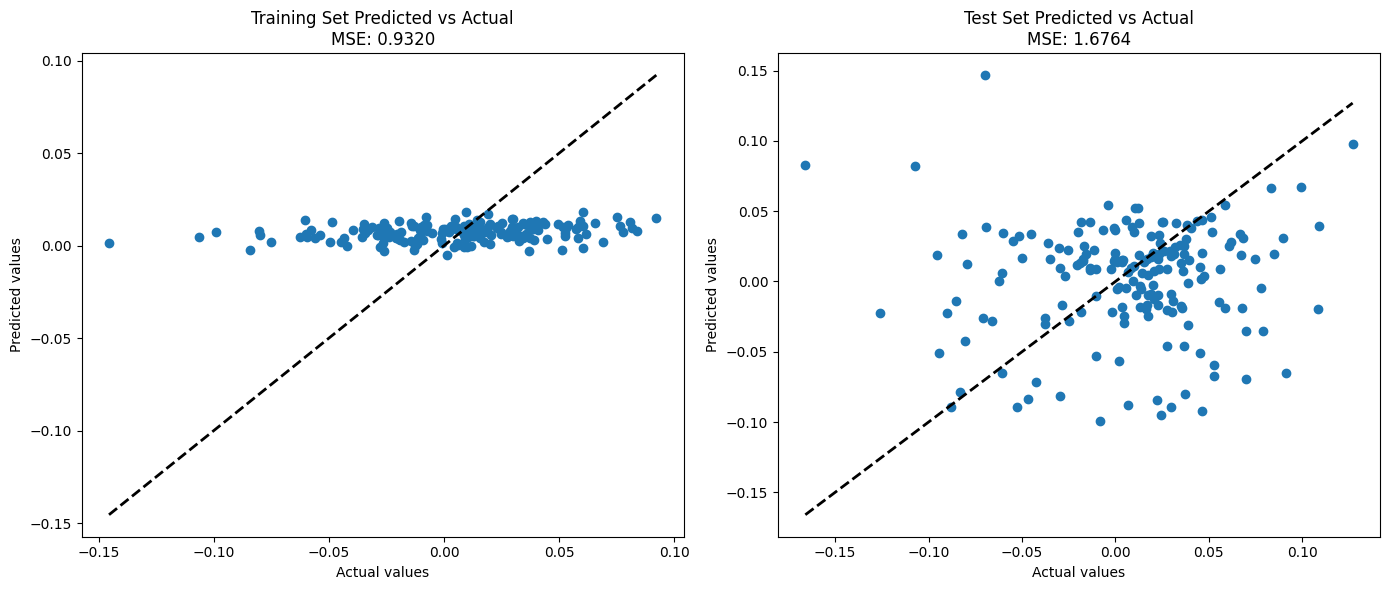

In [4]:
# Get predictions for both training and test sets
train_sample = [get_predictions(train_loader, models[seed]) for seed in range(num_seeds)]
test_sample = [get_predictions(test_loader, models[seed]) for seed in range(num_seeds)]
train_targets = train_sample[0][0]

#
train_predictions = np.concatenate([train_sample[seed][1].reshape(-1, 1) for seed in range(num_seeds)], axis=1).mean(1)

test_targets = test_sample[0][0]
all_test_predictions = np.concatenate([test_sample[seed][1].reshape(-1, 1) for seed in range(num_seeds)], axis=1)
test_predictions = all_test_predictions.mean(1)

# Calculate MSE for both training and test sets
train_mse = np.mean((train_targets - train_predictions) ** 2) / np.mean(train_targets ** 2)
test_mse = np.mean((test_targets.reshape(-1, 1) - test_predictions) ** 2) / np.mean(test_targets ** 2)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Training set subplot
axs[0].scatter(train_targets, train_predictions)
axs[0].plot([train_targets.min(), train_targets.max()], [train_targets.min(), train_targets.max()], 'k--', lw=2)  # Diagonal line
axs[0].set_xlabel('Actual values')
axs[0].set_ylabel('Predicted values')
axs[0].set_title(f'Training Set Predicted vs Actual\nMSE: {train_mse:.4f}')

# Test set subplot
axs[1].scatter(test_targets, test_predictions)#.mean(1))
axs[1].plot([test_targets.min(), test_targets.max()], [test_targets.min(), test_targets.max()], 'k--', lw=2)  # Diagonal line
axs[1].set_xlabel('Actual values')
axs[1].set_ylabel('Predicted values')
axs[1].set_title(f'Test Set Predicted vs Actual\nMSE: {test_mse:.4f}')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, '0    0.56\n1    0.17\ndtype: float32')

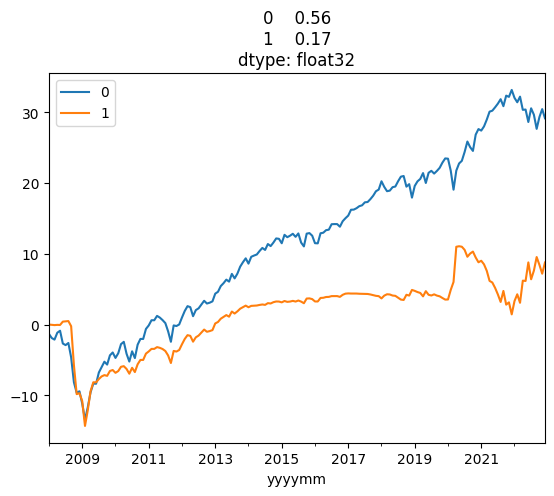

In [5]:
# now I define R_{t+1} * pi_t
# test_predictions have 10 columns, each column corresponding to a different random seed
timed_returns = test_targets.reshape(-1, 1) * test_predictions.reshape(-1, 1)
together = pd.DataFrame(np.concatenate([test_targets.reshape(-1, 1), timed_returns], axis=1), index=test_dates)
(together / together.std()).cumsum().plot()
plt.title(f'{GoyalWelchData.sharpe_ratio(together)}')

In [6]:
model = models[0]
model.eval()
train_data_predictions, train_data_features = model(X_train_tensor, return_last_hidden=True)
print(train_data_predictions.shape)
print(train_data_features.shape)

test_data_predictions, test_data_features = model(X_test_tensor, return_last_hidden=True)


torch.Size([179, 1])
torch.Size([179, 256])


In [7]:
output_layer = list(model.layers)[-1]  # Get the last layer
# Now, access its weights and biases
weights = output_layer.weight.data
biases = output_layer.bias.data
print("Weights of the output layer:", weights)
print("Biases of the output layer:", biases)

Weights of the output layer: tensor([[-5.1489e-02, -4.8106e-02, -2.3938e-02, -3.8388e-02, -8.7325e-03,
         -4.7826e-02,  8.0117e-02, -9.0353e-03, -9.9445e-02, -3.2754e-02,
         -9.0718e-02, -1.0398e-02,  1.2674e-02,  1.2195e-02, -2.7877e-02,
         -3.7773e-02,  3.6560e-02,  4.4878e-02, -6.1249e-02,  2.2794e-02,
          4.8026e-02, -3.6255e-04,  3.9335e-02, -2.8243e-02, -1.4078e-02,
         -6.6835e-02, -1.0461e-02, -8.5239e-02, -1.6866e-01,  8.5839e-03,
         -4.5333e-02,  2.7545e-02, -5.8065e-03,  6.0205e-02,  3.9050e-02,
          1.6792e-02, -1.8173e-02, -6.5845e-02, -7.6233e-02, -2.7340e-02,
          1.9822e-02,  4.5001e-02, -2.4102e-02,  4.1100e-02,  3.7128e-02,
         -4.7426e-02, -4.5837e-04, -3.3235e-02, -4.5923e-02,  3.0192e-02,
         -6.8266e-02,  1.4702e-01,  1.9424e-02, -7.7843e-02, -3.2372e-03,
         -2.2314e-02, -5.1876e-02, -2.9420e-02, -3.0510e-02,  8.1620e-03,
         -1.3764e-02,  3.6926e-02,  2.5217e-02, -2.5821e-02,  6.6520e-02,
         

#Note that
$$
f(x)\ =\ \sum_{i=1}^n W_{3,i}h_i(x) +b_3\cdot 1
$$
#and hence, to re-produce the output of the neural net, we need to add an "additional" feature equal to 1. We do this using torch.ones([train_data_features.shape[0], 1])

In [8]:
new_X_train = torch.concatenate([train_data_features, torch.ones([train_data_features.shape[0], 1])], axis=1)
new_X_test = torch.concatenate([test_data_features, torch.ones([test_data_features.shape[0], 1])], axis=1)


In [9]:
shrinkage_list = [0.00000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
beta_estimate_using_train_sample, oos_predictions = ridge_regr(signals=new_X_train.detach().numpy(),
                                                                labels=y_train,
                                                                future_signals=new_X_test.detach().numpy(),
                                                                shrinkage_list=shrinkage_list)


In [10]:
fine_tuned_mse = np.mean((test_targets.reshape(-1, 1) - oos_predictions) ** 2, axis=0) / np.mean((test_targets) ** 2)
print(fine_tuned_mse)

[896.2903633   36.10880843   3.44679785   1.53355672   1.02502985
   0.97313635   0.97872488   0.99263263   0.99906146   0.99990356]


Text(0.5, 1.0, '0     0.56\n1    -0.61\n2    -0.42\n3    -0.03\n4     0.08\n5     0.29\n6     0.54\n7     0.51\n8     0.50\n9     0.50\n10    0.50\ndtype: float64')

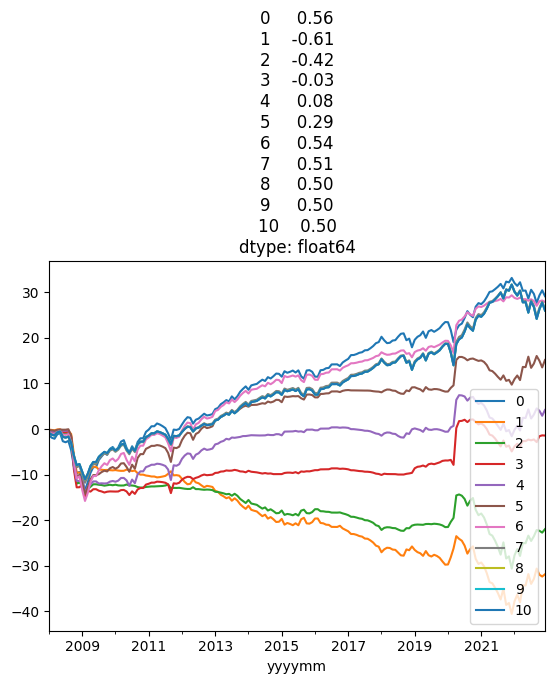

In [11]:
timed_returns = test_targets.reshape(-1, 1) * oos_predictions
together = pd.DataFrame(np.concatenate([test_targets.reshape(-1, 1), timed_returns], axis=1), index=test_dates)
(together / together.std()).cumsum().plot()
plt.title(f'{GoyalWelchData.sharpe_ratio(together)}')